In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


2022-07-20 13:53:17.140381: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-20 13:53:17.143410: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-20 13:53:17.143422: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
(xtr, ytr) , (xte ,yte)=keras.datasets.mnist.load_data()

In [6]:
len(xtr)
len(ytr)

60000

In [7]:
len(xte)

10000

In [8]:
xtr[0].shape

(28, 28)

In [9]:
xtr[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

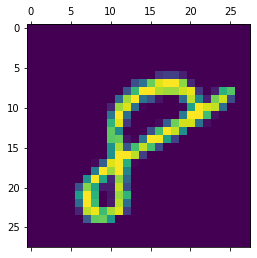

In [10]:
plt.matshow(xtr[59999])

In [11]:
ytr[59999]

8

In [12]:
xtr=xtr/255
xte=xte/255

In [13]:
xtr[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
xtr_ft=xtr.reshape(len(xtr),28*28)
xte_ft=xte.reshape(len(xte),28*28)

In [15]:
xtr_ft[0].shape

(784,)

In [16]:
xtr_ft[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Traning Model 

In [17]:
model=keras.Sequential([
            keras.layers.Dense(1,input_shape=(784,),activation='relu')
])
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.fit(xtr_ft,ytr,epochs=20)


2022-07-20 13:53:19.212845: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-20 13:53:19.212879: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-20 13:53:19.212900: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (linux): /proc/driver/nvidia/version does not exist
2022-07-20 13:53:19.213187: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
1875/1875 [==============================] - 2s 783us/step - loss: 4.6313 - accuracy: 0.1428
Epoch 2/20
1875/1875 [==============================] - 1s 761us/step - loss: 3.5855 - accuracy: 0.1485
Epoch 3/20
1875/1875 [==============================] - 1s 732us/step - loss: 3.4358 - accuracy: 0.1469
Epoch 4/20
1875/1875 [==============================] - 1s 722us/step - loss: 3.3528 - accuracy: 0.1456
Epoch 5/20
1875/1875 [==============================] - 2s 805us/step - loss: 3.3045 - accuracy: 0.1442
Epoch 6/20
1875/1875 [==============================] - 2s 871us/step - loss: 3.2797 - accuracy: 0.1443
Epoch 7/20
1875/1875 [==============================] - 1s 797us/step - loss: 3.2594 - accuracy: 0.1436
Epoch 8/20
1875/1875 [==============================] - 1s 740us/step - loss: 3.2501 - accuracy: 0.1439
Epoch 9/20
1875/1875 [==============================] - 1s 755us/step - loss: 3.2454 - accuracy: 0.1437
Epoch 10/20
1875/1875 [==============================] - 2s 820u

In [18]:
model.evaluate(xte_ft,yte)

313/313 [==============================] - 0s 668us/step - loss: 3.1282 - accuracy: 0.1429


[3.128202199935913, 0.1429000049829483]

In [19]:
ypr=model.predict(xte_ft)
ypr[0]

313/313 [==============================] - 0s 510us/step


array([6.208768], dtype=float32)

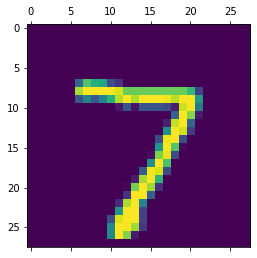

In [20]:
plt.matshow(xte[0])

In [21]:
yte[0]

7

#### Comparing predicted values with test values

In [22]:
y_predicted=[np.argmax(i) for i in ypr]

In [23]:
y_predicted[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [24]:
yte[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [25]:
model=keras.Sequential([
            keras.layers.Dense(500,input_shape=(784,),activation='relu'),
            keras.layers.Dense(250 ,activation='relu'),
            keras.layers.Dense(50 ,activation='relu'),
            keras.layers.Dense(1,activation='relu'),
    
])
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.fit(xtr_ft,ytr,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2949 - accuracy: 0.1981
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5667 - accuracy: 0.2060
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4041 - accuracy: 0.2075
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3163 - accuracy: 0.2079
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2479 - accuracy: 0.2086
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1977 - accuracy: 0.2092
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1782 - accuracy: 0.2094
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1530 - accuracy: 0.2096
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1253 - accuracy: 0.2100
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.113

In [26]:
pre=model.predict(xte_ft)
pre


313/313 [==============================] - 0s 1ms/step


array([[6.937486 ],
       [1.7172389],
       [0.8868761],
       ...,
       [4.0364976],
       [4.9442425],
       [5.847156 ]], dtype=float32)

In [27]:
y_predicted=model.predict(xte_ft)

313/313 [==============================] - 0s 1ms/step


In [28]:
y_predicted

array([[6.937486 ],
       [1.7172389],
       [0.8868761],
       ...,
       [4.0364976],
       [4.9442425],
       [5.847156 ]], dtype=float32)

In [29]:
y_predicted=np.round(y_predicted)

In [30]:
y_predicted[:5]

array([[7.],
       [2.],
       [1.],
       [0.],
       [4.]], dtype=float32)

In [31]:
yte[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [32]:
acr=0
for i in range(len(y_predicted)):
    if(y_predicted[i]==yte[i]):
        acr+=1
accuracy=acr/len(y_predicted)
print(accuracy)

0.9507


In [37]:
loss=0
for i in range(len(y_predicted)):
    loss+=(y_predicted[i]-yte[i])**2
print((loss/len(y_predicted))**0.5)

[0.56062466]


In [38]:
from sklearn import metrics 

In [39]:
print(metrics.precision_score(y_true=yte,y_pred=y_predicted,labels=[1],average=None))

[0.98762157]


In [40]:
print(metrics.recall_score(y_true=yte,y_pred=y_predicted,labels=[1],average=None))

[0.98414097]


In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 500)               392500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 50)                12550     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 530,351
Trainable params: 530,351
Non-trainable params: 0
_________________________________________________________________


## Accuracy of model  :  0.9507
## Loss of model    :  0.56062466 (Root Mean Squared Error )
## Precision for Digit 1   :  0.98762157
## Recall for Digit 1        :  0.98414097
